In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
company = pd.read_csv('Company_data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<AxesSubplot:xlabel='Sales'>

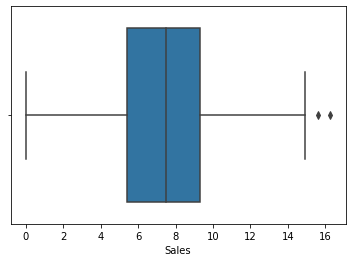

In [8]:
import seaborn as sns
sns.boxplot(company.Sales)

In [9]:
company_2 = company.copy()

In [10]:
company_2.loc[company_2["Sales"]>=7.5,"sales"]="High Sales"
company_2.loc[company_2["Sales"]<=7.5,"sales"]="Low Sales"
company_2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High Sales
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High Sales
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High Sales
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low Sales
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low Sales
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High Sales
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Low Sales
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Low Sales
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Low Sales


In [11]:
company_2 = company_2.drop(['Sales'],axis=1)

In [12]:
label_encoder=LabelEncoder()
select_columns=["ShelveLoc","Urban","US","sales"]
label_encoder.fit(company_2[select_columns].values.flatten())
company_2[select_columns]=company_2[select_columns].apply(label_encoder.fit_transform)
company_2

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,0
396,139,23,3,37,120,2,55,11,0,1,1
397,162,26,12,368,159,2,40,18,1,1,1
398,100,79,7,284,95,0,50,12,1,1,1


In [13]:
X = company_2.iloc[:,0:10]

In [14]:
Y = company_2.iloc[:,10]

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=15)

## Building Random Forest Model

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators = num_trees,max_features = max_features)
result = cross_val_score(model,X_train,Y_train,cv = kfold)
print(result.mean())

0.75625


In [22]:
model.fit(X_train,Y_train)

RandomForestClassifier(max_features=3)

In [23]:
preds = model.predict(X_test)
pd.Series(preds).value_counts()

1    41
0    39
dtype: int64

In [24]:
pd.crosstab(Y_test,preds)

col_0,0,1
sales,,
0,34,4
1,5,37


In [25]:
# Accuracy
np.mean(preds==Y_test)

0.8875